```Python
from vqls import VQLS
from qiskit.primitives import Estimator 

estimator = Estimator()
vqls = VQLS(estimator, ansatz, COBYLA(maxiter=2, disp=True))
res = vqls.solve(A, b)
```

In [5]:
from vqls_prototype import VQLS, VQLSLog
from qiskit.primitives import Estimator, Sampler
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
import numpy as np

nqbit = 2
size = 2**nqbit
A = np.random.rand(size, size)
A = A + A.T

b = np.random.rand(size)

ref_solution = np.linalg.solve(A, b / np.linalg.norm(b))
ref_solution = ref_solution / np.linalg.norm(ref_solution)

ansatz = RealAmplitudes(nqbit, entanglement="full", reps=3, insert_barriers=False)

estimator = Estimator()
sampler = Sampler()
vqls = VQLS(
    estimator,
    ansatz,
    COBYLA(maxiter=250, disp=True),
    sampler=sampler,
    options={"use_overlap_test": False, "use_local_cost_function": False},
)

res = vqls.solve(A, b)


   Normal return from subroutine COBYLA

   NFVALS =  106   F = 2.464137E-08    MAXCV = 0.000000E+00
   X = 1.791470E+00  -4.644593E-01  -3.093074E-01  -2.956650E+00  -2.827251E+00
      -2.555117E+00   4.158452E-01   3.409094E+00


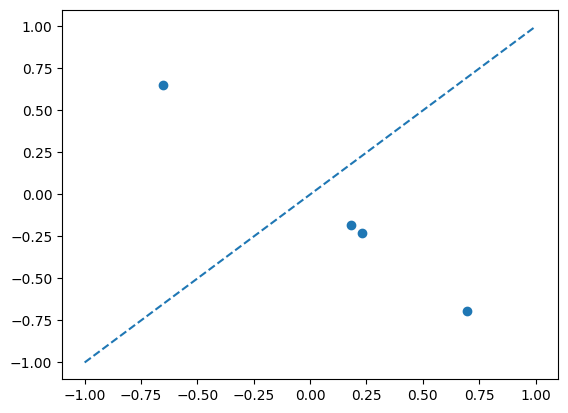

In [6]:
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

ref_solution = np.linalg.solve(A, b / np.linalg.norm(b))
ref_solution = ref_solution / np.linalg.norm(ref_solution)
vqls_solution = np.real(Statevector(res.state).data)

plt.scatter(ref_solution, -vqls_solution)
plt.plot([-1, 1], [-1, 1], "--")

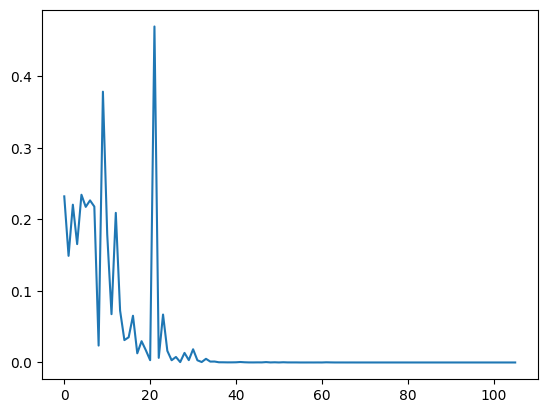

In [7]:
plt.plot(vqls.logger.values)

In [11]:
A

array([[1.4502022 , 0.57548678, 0.85502636, 0.64240842],
       [0.57548678, 0.70995222, 0.96004586, 1.44870326],
       [0.85502636, 0.96004586, 0.46028435, 1.17777444],
       [0.64240842, 1.44870326, 1.17777444, 0.13543237]])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 1933.30it/s]


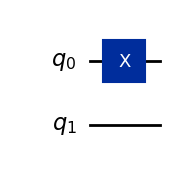

In [13]:
from vqls_prototype.matrix_decomposition import PauliDecomposition

pauli_decomposition = PauliDecomposition(A)
pauli_decomposition.circuits[1].draw("mpl")

In [18]:
pauli_decomposition.circuits[0]

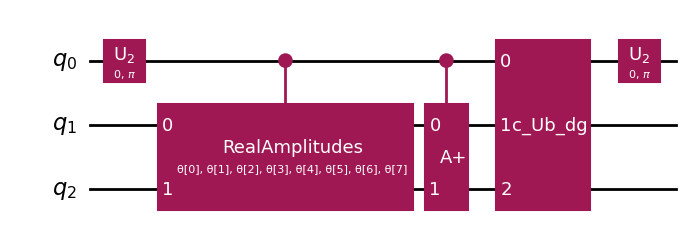

In [9]:
vqls.options = vqls._validate_solve_options({"use_local_cost_function": False, "use_overlap_test": False})
_, qc_test = vqls.construct_circuit(A, b)
qc_test[0].circuits[0].decompose().draw("mpl")

In [2]:
import numpy as np
from vqls_prototype import VQLS, VQLSLog
from qiskit.primitives import Estimator, Sampler
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
from qiskit_algorithms import optimizers as opt
import numpy as np

size = 4

# define the matrix of the problem
A = np.random.rand(size, size)
A = A + A.T

# define the b vector
b = np.random.rand(size)

# define the ansatz
ansatz = RealAmplitudes(2, entanglement="full", reps=3)

# define the VQLS solver
log = VQLSLog([],[])
estimator = Estimator()
vqls = VQLS(
    estimator,
    ansatz,
    opt.CG(maxiter=200, tol=1e-3),
    callback=log.update 
)

# run the solver
res = vqls.solve(A, b)

TypeError: VQLS.__init__() got an unexpected keyword argument 'callback'

In [9]:
from vqls import VQLS, VQLSLog
from qiskit.primitives import Estimator, Sampler
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, CG, QNSPSA, POWELL
import numpy as np
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

In [12]:
nqbit = 2
size = 2**nqbit
A = np.random.rand(size, size)
A = A + A.T


# or Laplacian
# Setup a tridiagonal matrix
# from scipy.sparse import diags
# from scipy.sparse.linalg import eigs
# k = [np.ones(size-1), -2*np.ones(size), np.ones(size-1)]
# offset = [-1, 0, 1]
# A = diags(k,offset).toarray()


# Cao's case
A = 0.25*np.array([[15, 9, 5, -3], [9, 15, 3, -5], [5, 3, 15, -9], [-3, -5, -9, 15]])

print("A matrix = \n", A)

A matrix = 
 [[ 3.75  2.25  1.25 -0.75]
 [ 2.25  3.75  0.75 -1.25]
 [ 1.25  0.75  3.75 -2.25]
 [-0.75 -1.25 -2.25  3.75]]


b =  [0.5 0.5 0.5 0.5]


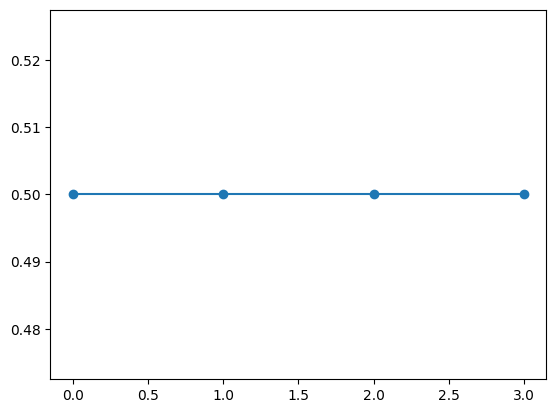

In [13]:
b = np.random.rand(size)
b = np.array([1,1,1,1])/2
# b = np.ones(size)
print("b = ", b)
plt.plot(b, "o-")

x/|x| = 
 [-0.05423261  0.3796283   0.59655876  0.70502399]


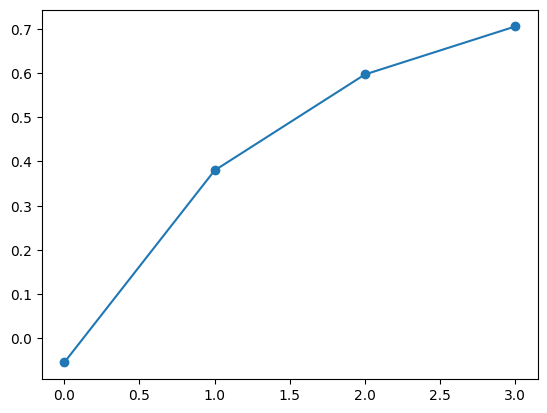

In [14]:
ref_solution = np.linalg.solve(A, b / np.linalg.norm(b))
ref_solution = ref_solution / np.linalg.norm(ref_solution)
print("x/|x| = \n", ref_solution)
plt.plot(ref_solution, "o-")

In [19]:
ansatz = RealAmplitudes(nqbit, entanglement="full", reps=4, insert_barriers=False)

In [29]:
log = VQLSLog([], [])
estimator = Estimator()
sampler = Sampler()
vqls = VQLS(
    estimator,
    ansatz,
    COBYLA(maxiter=300, disp=True, tol=1e-3),
#     L_BFGS_B(maxiter=5000, ftol=1e-4), 
#     CG(maxiter=5000, tol=1e-3),
    sampler=sampler,
    callback=log.update,
)

In [30]:
opt = {"use_overlap_test": True, "use_local_cost_function": False}
res = vqls.solve(A, b, opt)

VQLS Iteration 284 Cost 0.00010333870349055196
   Normal return from subroutine COBYLA

   NFVALS =  284   F = 1.033387E-04    MAXCV = 0.000000E+00
   X = 1.592514E+00   1.394055E+00   3.027523E+00  -8.979052E-01  -4.438809E-01
      -1.527291E+00  -2.379266E+00  -3.575562E+00   3.057792E+00   2.938701E+00


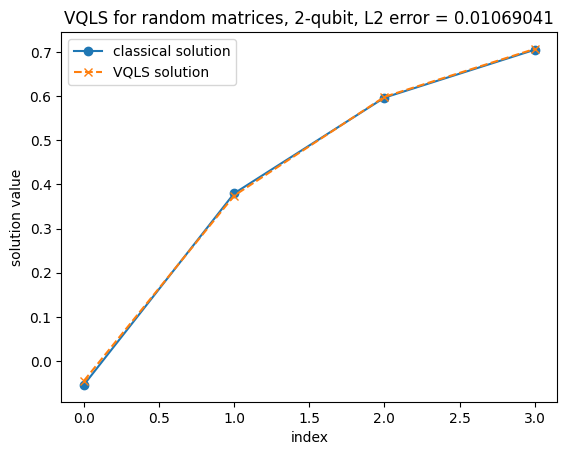

In [31]:
vqls_solution = np.real(Statevector(res.state).data)
err = np.linalg.norm(ref_solution - vqls_solution)

plt.plot(ref_solution, "o-", label="classical solution")
plt.plot(vqls_solution, "x--", label="VQLS solution")
plt.xlabel("index")
plt.ylabel("solution value")
plt.title("VQLS for random matrices, {0}-qubit, L2 error = {1:.8f}".format(nqbit, err))
plt.legend()
# plt.savefig("5-qubit 1D random Poisson", dpi=500)

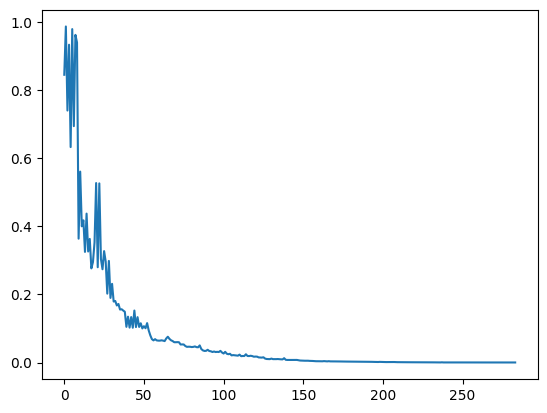

In [32]:
plt.plot(log.values)

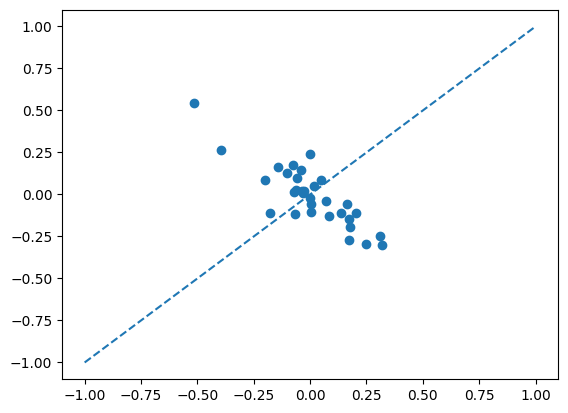

In [117]:
ref_solution = np.linalg.solve(A, b / np.linalg.norm(b))
ref_solution = ref_solution / np.linalg.norm(ref_solution)
vqls_solution = np.real(Statevector(res.state).data)

plt.scatter(ref_solution, vqls_solution)
plt.plot([-1, 1], [-1, 1], "--")

In [57]:
solutions = []
for p in log.parameters:
    qc = vqls.ansatz.assign_parameters(p)
    x = Statevector(qc.to_instruction()).data.real
    solutions.append(x)

/var/folders/3t/7ts1c6s95hq650lfkvk66tkh0000gn/T/ipykernel_49465/1727559487.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(ref_solution, -s, c=[c] * 4, cmap="jet", s=10 * (1 - c), alpha=0.1)
/var/folders/3t/7ts1c6s95hq650lfkvk66tkh0000gn/T/ipykernel_49465/1727559487.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(ref_solution, -s, c=[c] * 4, cmap="jet", s=10 * (1 - c), alpha=0.1)


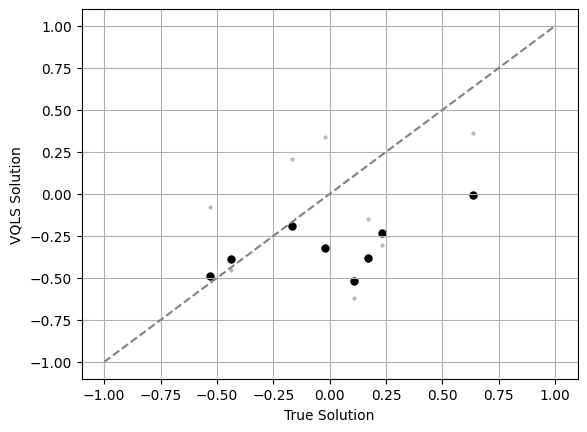

In [58]:
colors = log.values[:-1]
colors /= np.max(colors)
for img in range(1, 50):
    plt.cla()
    for c, s in zip(colors[: img - 1], solutions[: img - 1]):
        plt.scatter(ref_solution, -s, c=[c] * 4, cmap="jet", s=10 * (1 - c), alpha=0.1)
    plt.scatter(ref_solution, -solutions[img], s=50, edgecolors="white", c="black")
    plt.plot([-1, 1], [-1, 1], "--", c="grey")
    plt.grid()
    plt.xlabel("True Solution")
    plt.ylabel("VQLS Solution")
    # img_name = "./image/image_%03d.png" %img
    # plt.savefig(img_name)